<a href="https://colab.research.google.com/github/Abinaya-hub2006/Computer_Vision/blob/main/Harris%20and%20Hough%20Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

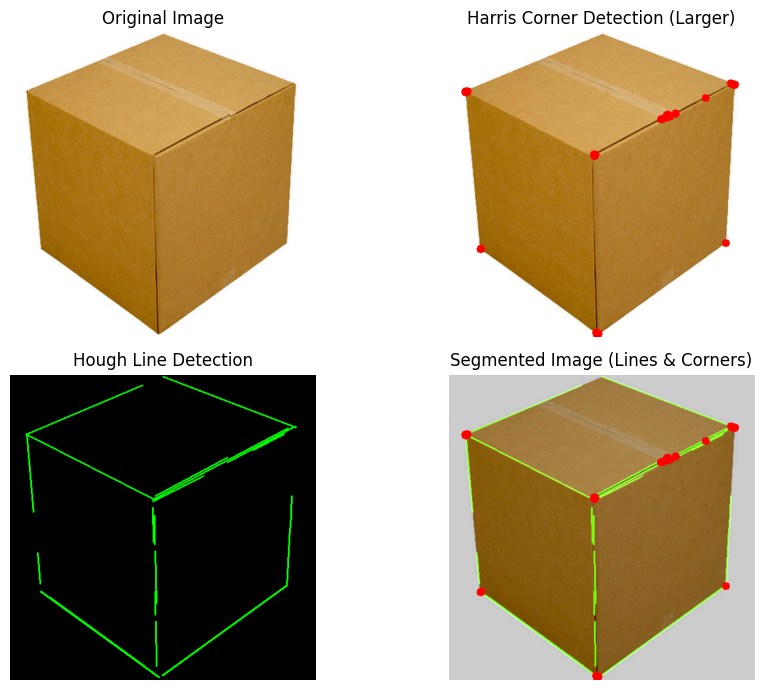

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/export-carton-box-1000x1000.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_float = np.float32(gray)
dst = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

corner_image = image.copy()


threshold = 0.01 * dst.max()
for y, x in np.argwhere(dst > threshold):
    cv2.circle(corner_image, (x, y), 5, (0, 0, 255), -1)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=80, minLineLength=30, maxLineGap=5)


line_image = np.zeros_like(image)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)


segmented_image = image.copy()
segmented_image = cv2.addWeighted(segmented_image, 0.8, line_image, 1, 0)

for y, x in np.argwhere(dst > threshold):
    cv2.circle(segmented_image, (x, y), 5, (0, 0, 255), -1)

fig, axes = plt.subplots(2, 2, figsize=(10, 7))

axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

axes[0, 1].imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title("Harris Corner Detection (Larger)")
axes[0, 1].axis("off")

axes[1, 0].imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title("Hough Line Detection")
axes[1, 0].axis("off")

axes[1, 1].imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title("Segmented Image (Lines & Corners)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

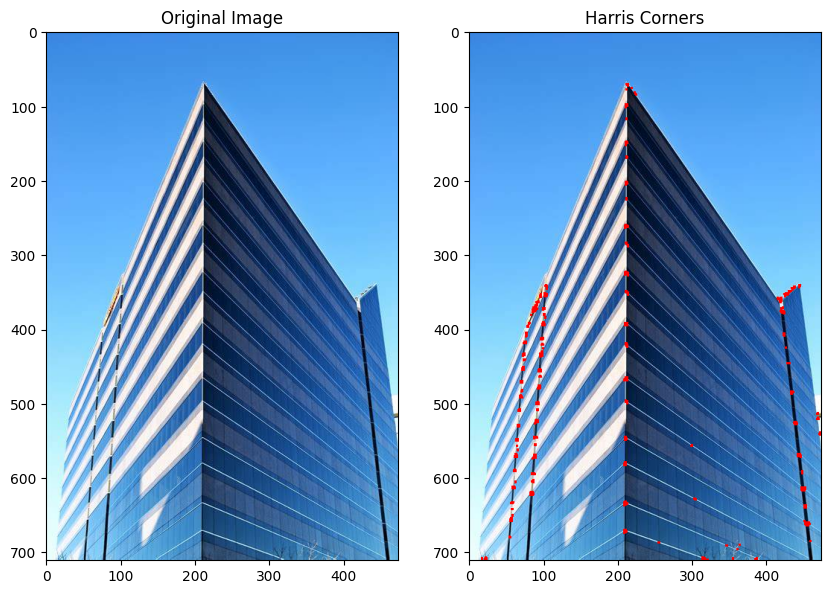

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = '/content/OIP.jpeg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None)
    image[dst > 0.01 * dst.max()] = [0, 0, 255]
    output = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.title('Harris Corners')
    plt.imshow(output)
    plt.show()


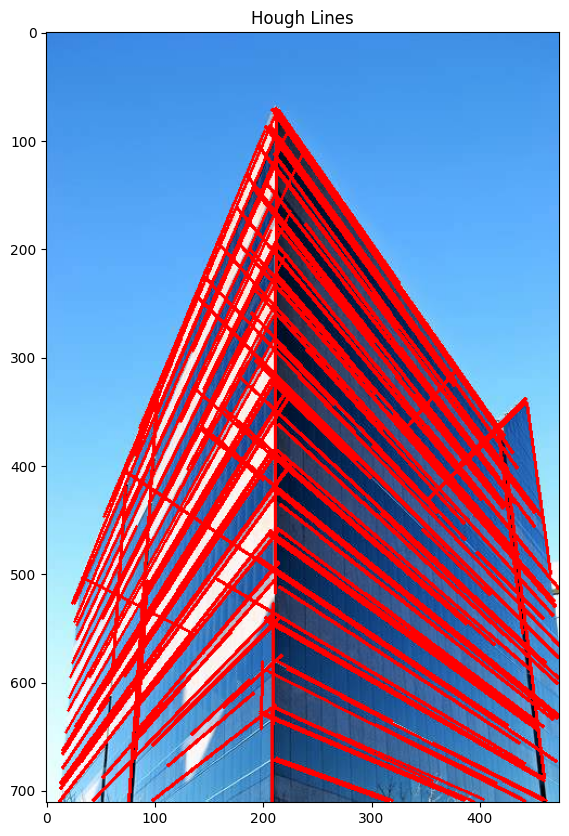

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/OIP.jpeg'
image = cv2.imread(image_path)
if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    edges = cv2.Canny(image, 50, 150, apertureSize=3)


    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)


    output = image.copy()


    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output, (x1, y1), (x2, y2), (0, 0, 255), 2)


    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.title('Hough Lines')
    plt.imshow(output_rgb)
    plt.show()
